In [2]:
import pandas as pd 
import numpy as numpy

#charger la list des C.V (data.csv)abs
data = pd.read_csv('clean_cv/data.csv')

df = pd.DataFrame(data)

# Afficherd les noms des colonnes
print(df.columns.tolist())



['Types de métiers recherchés', 'Expérience professionnelle', 'Compétences', 'Formation', 'Compétences clés', 'Langues', "Plus d'informations"]


In [3]:
df = df.drop(columns=["Plus d'informations", "Langues"])

In [4]:

# Convertir tout en minuscules
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()

#suppriemer les espace au debut 
df = df.applymap(lambda x: x.lstrip() if isinstance(x, str) else x)
print(df.columns.tolist())


['Types de métiers recherchés', 'Expérience professionnelle', 'Compétences', 'Formation', 'Compétences clés']


In [5]:
print(df.head())

                         Types de métiers recherchés  \
0               informatique, nouvelles technologies   
1   commercial, vente gestion, comptabilité, fina...   
2               informatique, nouvelles technologies   
3   informatique, nouvelles technologies métiers ...   
4               informatique, nouvelles technologies   

                          Expérience professionnelle  \
0   expérience dans les secteurs d´activité suiva...   
1   expérience dans les secteurs d´activité suiva...   
2   expérience dans les secteurs d´activité suiva...   
3   expérience dans les secteurs d´activité suiva...   
4   expérience dans les secteurs d´activité suiva...   

                                         Compétences  \
0   développement web, notamment avec spring boot...   
1   développement web full stack (wordpress, next...   
2   vba excel dashboards python web html css js p...   
3   langages informatiques: python, java, dart fr...   
4   reactjs,nextjs,vuejs ,expressjs , nodejs, 

In [6]:
# Vérifier les types de données et les valeurs manquantes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Types de métiers recherchés  985 non-null    object
 1   Expérience professionnelle   985 non-null    object
 2   Compétences                  983 non-null    object
 3   Formation                    985 non-null    object
 4   Compétences clés             812 non-null    object
dtypes: object(5)
memory usage: 38.6+ KB
None


In [7]:
# Statistiques descriptives pour les colonnes numériques
print(df.describe())

                  Types de métiers recherchés  \
count                                     985   
unique                                    226   
top      informatique, nouvelles technologies   
freq                                      541   

                               Expérience professionnelle Compétences  \
count                                                 985         983   
unique                                                801         982   
top      expérience dans les secteurs d´activité suiva...           .   
freq                                                  116           2   

                                                Formation  \
count                                                 985   
unique                                                985   
top      niveau d'études : bac+5 et plus genie logicie...   
freq                                                    1   

                  Compétences clés  
count                          812  
unique  

In [8]:
#les valeurs manquantes
print(df.isnull().sum())

Types de métiers recherchés      0
Expérience professionnelle       0
Compétences                      2
Formation                        0
Compétences clés               173
dtype: int64


In [9]:
#Remplacer les valeurs manquantes par "Non spécifié" 
df["Compétences"] = df["Compétences"].fillna("Non spécifié")
df["Compétences clés"] = df["Compétences clés"].fillna("Non spécifié")

print(df.isnull().sum())

Types de métiers recherchés    0
Expérience professionnelle     0
Compétences                    0
Formation                      0
Compétences clés               0
dtype: int64


In [10]:
import re

# Nettoyer les colonnes  (retirer les emojis, ponctuation et symboles inutiles)
df['Compétences'] = df['Compétences'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
df['Compétences clés'] = df['Compétences clés'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
df['Expérience professionnelle'] = df['Expérience professionnelle'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
df['Formation'] = df['Formation'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

print(df.describe())

                  Types de métiers recherchés  \
count                                     985   
unique                                    226   
top      informatique, nouvelles technologies   
freq                                      541   

                               Expérience professionnelle Compétences  \
count                                                 985         985   
unique                                                801         982   
top      expérience dans les secteurs dactivité suivan...               
freq                                                  116           3   

                                                Formation Compétences clés  
count                                                 985              985  
unique                                                985              733  
top      niveau détudes  bac5 et plus genie logicielmi...     Non spécifié  
freq                                                    1              173  


In [11]:
print(df.isnull().sum())

Types de métiers recherchés    0
Expérience professionnelle     0
Compétences                    0
Formation                      0
Compétences clés               0
dtype: int64


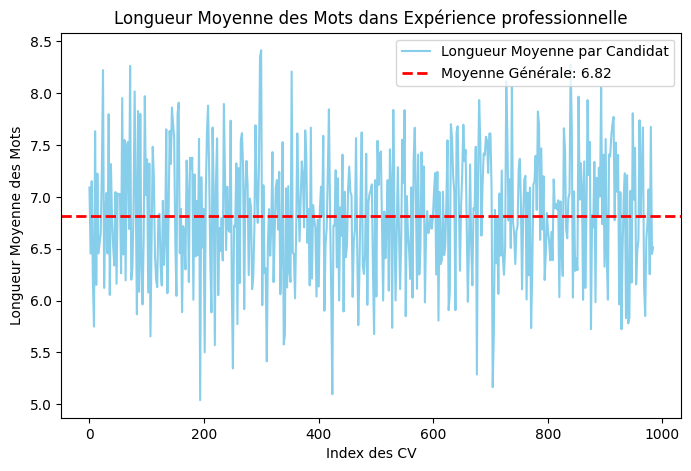

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import numpy as np
from scipy.stats import norm

# Fonction pour calculer la longueur moyenne des mots
def mean_word_length(text):
    if isinstance(text, str):
        words = text.split()
        return np.mean([len(word) for word in words]) if words else 0
    return 0

# Tracer directement sans stocker dans df
longueurs = df["Expérience professionnelle"].apply(mean_word_length)
moyenne_generale = longueurs.mean()

# Création d'une courbe lissée avec scipy
x = np.array(df.index)
y = np.array(longueurs)

# Utiliser make_interp_spline pour créer une courbe lisse
spl = make_interp_spline(x, y, k=3)  # k=3 pour une courbe cubique
x_new = np.linspace(x.min(), x.max(), 500)  # Générer plus de points pour une courbe lisse
y_new = spl(x_new)

# Tracer la courbe lissée
plt.figure(figsize=(8, 5))
plt.plot(x_new, y_new, color='skyblue', label="Longueur Moyenne par Candidat")

# Tracer la moyenne générale sous forme de ligne pointillée
plt.axhline(moyenne_generale, color='red', linestyle='dashed', linewidth=2, label=f"Moyenne Générale: {moyenne_generale:.2f}")

# Ajouter des labels et un titre
plt.xlabel("Index des CV")
plt.ylabel("Longueur Moyenne des Mots")
plt.title("Longueur Moyenne des Mots dans Expérience professionnelle")

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()




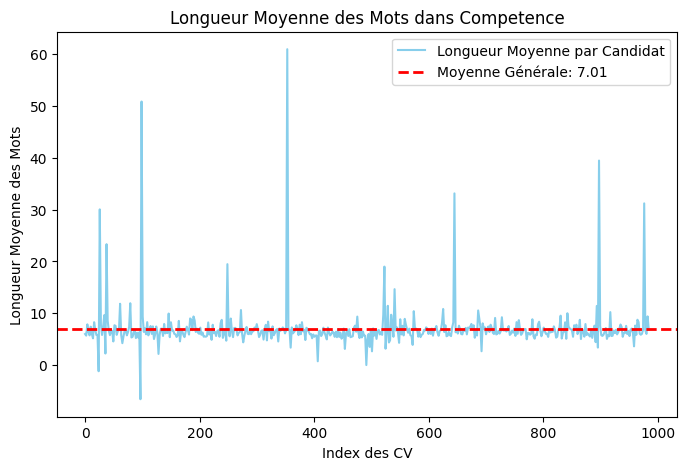

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.interpolate import make_interp_spline

# Fonction pour calculer la longueur moyenne des mots
def mean_word_length(text):
    if isinstance(text, str):
        words = text.split()
        return np.mean([len(word) for word in words]) if words else 0
    return 0

# Tracer directement sans stocker dans df
longueurs = df["Compétences"].apply(mean_word_length)
moyenne_generale = longueurs.mean()

# Création d'une courbe lissée avec scipy
x = np.array(df.index)
y = np.array(longueurs)

# Utiliser make_interp_spline pour créer une courbe lisse
spl = make_interp_spline(x, y, k=3)  # k=3 pour une courbe cubique
x_new = np.linspace(x.min(), x.max(), 500)  # Générer plus de points pour une courbe lisse
y_new = spl(x_new)

# Tracer la courbe lissée
plt.figure(figsize=(8, 5))
plt.plot(x_new, y_new, color='skyblue', label="Longueur Moyenne par Candidat")

# Tracer la moyenne générale sous forme de ligne pointillée
plt.axhline(moyenne_generale, color='red', linestyle='dashed', linewidth=2, label=f"Moyenne Générale: {moyenne_generale:.2f}")

# Ajouter des labels et un titre
plt.xlabel("Index des CV")
plt.ylabel("Longueur Moyenne des Mots")
plt.title("Longueur Moyenne des Mots dans Competence")

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()


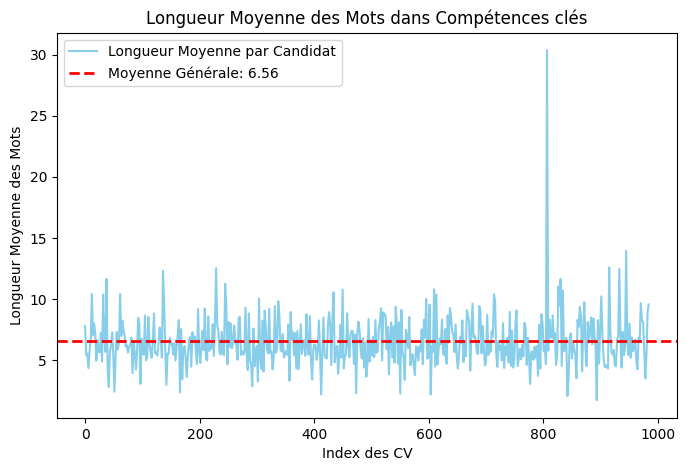

In [14]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Fonction pour calculer la longueur moyenne des mots
def mean_word_length(text):
    if isinstance(text, str):
        words = text.split()
        return np.mean([len(word) for word in words]) if words else 0
    return 0

# Tracer directement sans stocker dans df
longueurs = df["Compétences clés"].apply(mean_word_length)
moyenne_generale = longueurs.mean()

# Création d'une courbe lissée avec scipy
x = np.array(df.index)
y = np.array(longueurs)

# Utiliser make_interp_spline pour créer une courbe lisse
spl = make_interp_spline(x, y, k=3) 
x_new = np.linspace(x.min(), x.max(), 500) 
y_new = spl(x_new)

# Tracer la courbe lissée
plt.figure(figsize=(8, 5))
plt.plot(x_new, y_new, color='skyblue', label="Longueur Moyenne par Candidat")

# Tracer la moyenne générale sous forme de ligne pointillée
plt.axhline(moyenne_generale, color='red', linestyle='dashed', linewidth=2, label=f"Moyenne Générale: {moyenne_generale:.2f}")

plt.xlabel("Index des CV")
plt.ylabel("Longueur Moyenne des Mots")
plt.title("Longueur Moyenne des Mots dans Compétences clés")

plt.legend()

# Afficher le graphique
plt.show()


In [15]:
resume = df
resume["cv_resume"] = resume["Expérience professionnelle"].fillna('') + " " + resume["Compétences"].fillna('') + " " + resume["Formation"].fillna('') + " " + resume["Compétences clés"].fillna('')
print(resume.head())


                         Types de métiers recherchés  \
0               informatique, nouvelles technologies   
1   commercial, vente gestion, comptabilité, fina...   
2               informatique, nouvelles technologies   
3   informatique, nouvelles technologies métiers ...   
4               informatique, nouvelles technologies   

                          Expérience professionnelle  \
0   expérience dans les secteurs dactivité suivan...   
1   expérience dans les secteurs dactivité suivan...   
2   expérience dans les secteurs dactivité suivan...   
3   expérience dans les secteurs dactivité suivan...   
4   expérience dans les secteurs dactivité suivan...   

                                         Compétences  \
0   développement web notamment avec spring boot ...   
1   développement web full stack wordpress nextjs...   
2   vba excel dashboards python web html css js p...   
3   langages informatiques python java dart frame...   
4   reactjsnextjsvuejs expressjs  nodejs redux

In [16]:
#Applique S-BERT sur le C.V global
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# Chargement du modèle pré-entraîné (par exemple, paraphrase-MiniLM-L6-v2)
model = SentenceTransformer('all-MiniLM-L6-v2')

In [17]:
offre_emploi = "Recherche développeur full-stack avec compétences en Spring Boot et React."

# Embedding pour l'offre d'emploi
offre_embedding = model.encode(offre_emploi).reshape(1,-1) 

# Embedding pour les cvs
cv_embeddings = model.encode(resume["cv_resume"].tolist()) 




In [18]:
# Calcul de la similarité cosinus entre l'offre d'emploi et chaque CV
similarities = cosine_similarity(offre_embedding, cv_embeddings)[0]

top_5_indices = np.argsort(similarities)[-5:][::-1]

# Affichage des résultats de similarité
for i in top_5_indices:
    print(f"Similarité avec CV {i+1}: {similarities[i]:.4f}")

Similarité avec CV 1: 0.6296
Similarité avec CV 733: 0.5914
Similarité avec CV 547: 0.5459
Similarité avec CV 333: 0.5418
Similarité avec CV 391: 0.5370


In [21]:
# applique S-BERT sur chauqe section individuel 

# Embeddings et similarités par section
cv_embeddings_expr = model.encode(resume["Expérience professionnelle"].tolist())
cv_embeddings_cmpet = model.encode(resume["Compétences"].tolist())
cv_embeddings_edu = model.encode(resume["Formation"].tolist())
cv_embeddings_cmpt_cle = model.encode(resume["Compétences clés"].tolist())

# calcul similarité de chaque section
similarities_expr = cosine_similarity(offre_embedding, cv_embeddings_expr)[0]
similarities_cmpet = cosine_similarity(offre_embedding, cv_embeddings_cmpet)[0]
similarities_edu = cosine_similarity(offre_embedding, cv_embeddings_edu)[0]
similarities_cmpet_cle = cosine_similarity(offre_embedding, cv_embeddings_cmpt_cle)[0]

top_5_expr = np.argsort(similarities_expr)[-5:][::-1]
top_5_cmpet = np.argsort(similarities_cmpet)[-5:][::-1]
top_5_edu = np.argsort(similarities_edu)[-5:][::-1]
top_5_cmpet_cle = np.argsort(similarities_cmpet_cle)[-5:][::-1]

# calcul simularite global 
# Poids attribués à chaque section (La relation de la moyenne pondérée )
weights = {
    "Expérience professionnelle": 0.4,
    "Compétences": 0.35,
    "Formation": 0.05,
    "Compétences clés": 0.2
}

# Calcul de la similarité globale en appliquant la moyenne pondérée
similarities_global = (
    weights["Expérience professionnelle"] * similarities_expr +
    weights["Compétences"] * similarities_cmpet +
    weights["Formation"] * similarities_edu +
    weights["Compétences clés"] * similarities_cmpet_cle
)

# Extraction des 5 CVs les plus similaires globalement
top_5_global = np.argsort(similarities_global)[-5:][::-1]



In [20]:
#afficher les 5 premier grand similarité de chaque section

# Affichage des résultats de similarité pour la section Expérience professionnelle
print("--------------------------------------------------------------")
print("\n")

for i in top_5_expr:
    print(f"Expérience professionnelle | Similarité avec CV {i+1}: {similarities_expr[i]:.4f}")
    
print("--------------------------------------------------------------")
print("\n")

# Affichage des résultats de similarité pour la section Compétences
for i in top_5_cmpet:
    print(f"Compétences | Similarité avec CV {i+1}: {similarities_cmpet[i]:.4f}")
    
print("--------------------------------------------------------------")
print("\n")

# Affichage des résultats de similarité pour la section Compétences
for i in top_5_edu:
    print(f"Formation | Similarité avec CV {i+1}: {similarities_edu[i]:.4f}")
    
print("--------------------------------------------------------------")
print("\n")

# Affichage des résultats de similarité pour la section Compétences
for i in top_5_cmpet_cle:
    print(f"Compétences clés | Similarité avec CV {i+1}: {similarities_cmpet_cle[i]:.4f}")
    
print("--------------------------------------------------------------")
print("\n")

for i in top_5_global:
    print(f"CV {i+1} | Similarité Globale : {similarities_global[i]:.4f}")





--------------------------------------------------------------


Expérience professionnelle | Similarité avec CV 104: 0.5492
Expérience professionnelle | Similarité avec CV 835: 0.5428
Expérience professionnelle | Similarité avec CV 745: 0.5215
Expérience professionnelle | Similarité avec CV 46: 0.5211
Expérience professionnelle | Similarité avec CV 479: 0.5145
--------------------------------------------------------------


Compétences | Similarité avec CV 445: 0.7246
Compétences | Similarité avec CV 1: 0.6574
Compétences | Similarité avec CV 853: 0.5657
Compétences | Similarité avec CV 136: 0.5606
Compétences | Similarité avec CV 220: 0.5419
--------------------------------------------------------------


Formation | Similarité avec CV 417: 0.5160
Formation | Similarité avec CV 152: 0.4555
Formation | Similarité avec CV 697: 0.4484
Formation | Similarité avec CV 438: 0.4385
Formation | Similarité avec CV 403: 0.4371
--------------------------------------------------------------


Com

In [33]:
#applique de tf-idf globalemnent
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

nlp = spacy.load("fr_core_news_sm")

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer()

offre_emploi = "Recherche développeur full-stack avec compétences en Spring Boot et React."

#tokenisation et lemmatisation
def preprocess_text(text):
    if isinstance(text, str):  # Vérifie que le texte est une chaîne de caractères
        doc = nlp(text)
        # Le retourner après avoir enlevé les mots vides et la ponctuation
        return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])
    return ""  # Retourner une chaîne vide si le texte n'est pas valide


# Prétraiter la la liste des C.Vs
data = resume
data['cv_resume'] = data['cv_resume'].apply(lambda x: preprocess_text(x))  # Traitement ligne par ligne

# Prétraiter l'offre
offre_emploi_clean = preprocess_text(offre_emploi)  

print("Offre d'emploi après prétraitement :", offre_emploi_clean)

print("---------------------------------------------------------")

print('Les CV resume après prétraitement : ',data["cv_resume"].head(1).tolist())


Offre d'emploi après prétraitement : recherche développeur full stack compétence Spring Boot react
---------------------------------------------------------
Les CV resume après prétraitement :  ['   expérience secteur dactivité    informatique ssii internet non renseigner    développement web spring boot reactj    niveau détude    bac5 geni logicielmiag hightech 102024    developmer web springboot javascript react']


In [36]:
# Vectoriser les CVs et l'offre d'emploi
vectorizer.fit([offre_emploi])

cv_vector = vectorizer.transform(data['cv_resume'])
offre_emploi_vector = vectorizer.transform([offre_emploi_clean])

# Calculer la similarité cosinus entre l'offre d'emploi et chaque CV
similarities_tf_idf = cosine_similarity(offre_emploi_vector, cv_vector)[0]

top_5_indices_tf_idf = np.argsort(similarities_tf_idf)[-5:][::-1]

# Affichage des résultats de similarité
for i in top_5_indices_tf_idf:
    print(f"Similarité avec CV {i+1}: {similarities_tf_idf[i]:.4f}")

Similarité avec CV 912: 0.9258
Similarité avec CV 479: 0.9258
Similarité avec CV 342: 0.9258
Similarité avec CV 445: 0.8895
Similarité avec CV 164: 0.8729


In [37]:
#applique de tf-idf sur chaque section

#pretraiter et lemmatiser chaque section 
data['Expérience professionnelle'] = data['Expérience professionnelle'].apply(lambda x: preprocess_text(x))  # Traitement ligne par ligne

data['Compétences'] = data['Compétences'].apply(lambda x: preprocess_text(x))  # Traitement ligne par ligne

data['Formation'] = data['Formation'].apply(lambda x: preprocess_text(x))  # Traitement ligne par ligne

data['Compétences clés'] = data['Compétences clés'].apply(lambda x: preprocess_text(x))  # Traitement ligne par ligne


cv_vector_exp = vectorizer.transform(data['Expérience professionnelle'])
cv_vector_cmpt = vectorizer.transform(data['Compétences'])
cv_vector_edu = vectorizer.transform(data['Formation'])
cv_vector_cmpt_cle = vectorizer.transform(data['Compétences clés'])

similarities_tf_idf_exp = cosine_similarity(offre_emploi_vector, cv_vector_exp)[0]
similarities_tf_idf_cmpt = cosine_similarity(offre_emploi_vector, cv_vector_cmpt)[0]
similarities_tf_idf_edu = cosine_similarity(offre_emploi_vector, cv_vector_edu)[0]
similarities_tf_idf_cmpt_cle = cosine_similarity(offre_emploi_vector, cv_vector_cmpt_cle)[0]


top_5_indices_tf_idf_exp = np.argsort(similarities_tf_idf_exp)[-5:][::-1]
top_5_indices_tf_idf_cmpt = np.argsort(similarities_tf_idf_cmpt)[-5:][::-1]
top_5_indices_tf_idf_edu = np.argsort(similarities_tf_idf_edu)[-5:][::-1]
top_5_indices_tf_idf_cmpt_cle = np.argsort(similarities_tf_idf_cmpt_cle)[-5:][::-1]

# Calcul de la similarité globale en appliquant la moyenne pondérée
similarities_global_tf_idf = (
    weights["Expérience professionnelle"] * similarities_tf_idf_exp +
    weights["Compétences"] * similarities_tf_idf_cmpt +
    weights["Formation"] * similarities_tf_idf_edu +
    weights["Compétences clés"] * similarities_tf_idf_cmpt_cle
)

# Extraction des 5 CVs les plus similaires globalement
top_5_global_tf_idf = np.argsort(similarities_global_tf_idf)[-5:][::-1]




InvalidParameterError: The 'X' parameter of cosine_similarity must be an array-like or a sparse matrix. Got 'recherche développeur full stack compétence Spring Boot react' instead.

In [70]:
# Affichage des résultats de similarité
print("--------------------------------------------------------------")
print("\n")

for i in top_5_indices_tf_idf_exp:
    print(f"Expérience professionnelle | Similarité avec CV {i+1}: {similarities_tf_idf_exp[i]:.4f}")

print("--------------------------------------------------------------")
print("\n")

for i in top_5_indices_tf_idf_cmpt:
    print(f"Compétence | Similarité avec CV {i+1}: {similarities_tf_idf_cmpt[i]:.4f}")

print("--------------------------------------------------------------")
print("\n")

for i in top_5_indices_tf_idf_edu:
    print(f"Formation | Similarité avec CV {i+1}: {similarities_tf_idf_edu[i]:.4f}")

print("--------------------------------------------------------------")
print("\n")

for i in top_5_indices_tf_idf_cmpt_cle:
    print(f"Competence cle | Similarité avec CV {i+1}: {similarities_tf_idf_cmpt_cle[i]:.4f}")

print("--------------------------------------------------------------")
print("\n")

for i in top_5_global_tf_idf:
    print(f"CV {i+1} | Similarité Globale : {similarities_global_tf_idf[i]:.4f}")

--------------------------------------------------------------


Expérience professionnelle | Similarité avec CV 853: 0.7977
Expérience professionnelle | Similarité avec CV 197: 0.7890
Expérience professionnelle | Similarité avec CV 835: 0.7628
Expérience professionnelle | Similarité avec CV 37: 0.7526
Expérience professionnelle | Similarité avec CV 462: 0.7135
--------------------------------------------------------------


Compétence | Similarité avec CV 169: 0.7538
Compétence | Similarité avec CV 445: 0.7444
Compétence | Similarité avec CV 103: 0.7096
Compétence | Similarité avec CV 912: 0.7035
Compétence | Similarité avec CV 429: 0.7035
--------------------------------------------------------------


Formation | Similarité avec CV 438: 0.7435
Formation | Similarité avec CV 533: 0.7385
Formation | Similarité avec CV 152: 0.7239
Formation | Similarité avec CV 73: 0.7006
Formation | Similarité avec CV 853: 0.6742
--------------------------------------------------------------


Compete

In [ ]:
#appliuqer Word2vec
